In [1]:
import pandas as pd
import numpy as np
import datetime
from sim import generate_simulation
from model_cancellations import get_otb_res, predict_cancellations

pd.options.display.max_rows = 60
pd.options.display.max_columns = 70

In [2]:
h1_capacity = 187
h2_capacity = 226
AOD = "2017-08-01"
AOD_dt = pd.to_datetime(AOD)

h1_res = pd.read_pickle("pickle/h1_res.pick")
h2_res = pd.read_pickle("pickle/h2_res.pick")
h1_dbd = pd.read_pickle("pickle/h1_dbd.pick")
h2_dbd = pd.read_pickle("pickle/h2_dbd.pick")
# h1_sim = pd.read_pickle("pickle/h1_sim.pick")
# h2_sim = pd.read_pickle("pickle/h2_sim.pick")

Split complete.
Training sample size: 38016
Testing sample Size: 1765




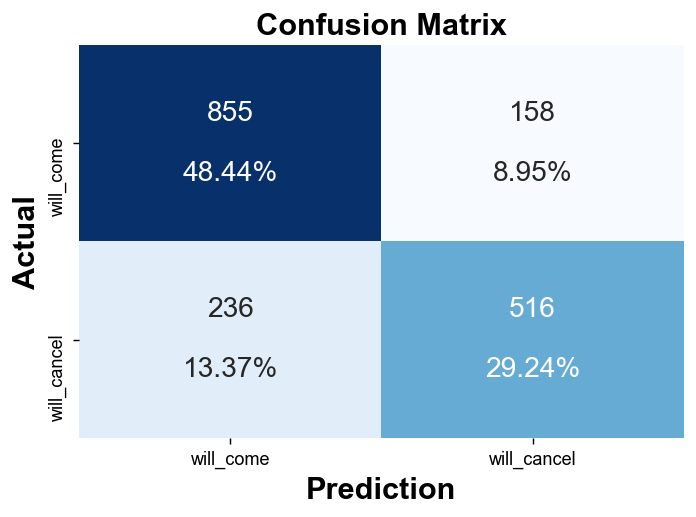

Optimal probability threshold (to maximize F-0.5): 0.648
F-0.5 Score: 0.748



In [3]:
h1_otb = predict_cancellations(h1_res, AOD, 1, print_len=True)

In [4]:
h1_otb

,ResNum,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,Meal,Country,MarketSegment,DistributionChannel,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,ReservedRoomType,AssignedRoomType,BookingChanges,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate,ArrivalDate,LOS,CheckoutDate,...,ResMadeDate,NumPeople,CT_is_grp,CT_is_trn,CT_is_trnP,RS_No-Show,MS_Corporate,MS_Direct,MS_Groups,MS_Offline TA/TO,MS_Online TA,DC_Direct,DC_TA/TO,DC_Undefined,MEAL_FB,MEAL_HB,MEAL_SC,MEAL_Undefined,FROM_PRT,FROM_GBR,FROM_ESP,FROM_IRL,FROM_FRA,FROM_DEU,FROM_CN,FROM_NLD,FROM_USA,FROM_ITA,FROM_other,DT_NonRefundable,DT_Refundable,AgencyBooking,CompanyListed,DaysUntilArrival,will_cancel
0,0,0,342,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01,2015-07-01,0,2015-07-01,...,2014-07-24,2,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,True,False,False,False,False,False,False,False,False,False,False,0,0,False,False,762,NaN
1,1,0,737,2015,July,27,1,0,0,2,0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01,2015-07-01,0,2015-07-01,...,2013-06-24,2,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,True,False,False,False,False,False,False,False,False,False,False,0,0,False,False,762,NaN
2,2,0,7,2015,July,27,1,0,1,1,0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02,2015-07-01,1,2015-07-02,...,2015-06-24,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,False,True,False,False,False,False,False,False,False,False,False,0,0,False,False,762,NaN
3,3,0,13,2015,July,27,1,0,1,1,0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02,2015-07-01,1,2015-07-02,...,2015-06-18,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,False,True,False,False,False,False,False,False,False,False,False,0,0,True,False,762,NaN
4,4,0,14,2015,July,27,1,0,2,2,0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03,2015-07-01,2,2015-07-03,...,2015-06-17,2,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,False,True,False,False,False,False,False,False,False,False,False,0,0,True,False,762,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40055,40055,0,212,2017,August,35,31,2,8,2,1,0,BB,GBR,Offline TA/TO,TA/TO,0,0,0,A,A,1,No Deposit,143,NaN,0,Transient,89.75,0,0,Check-Out,2017-09-10,2017-08-31,10,2017-09-10,...,2017-01-31,3,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,False,True,False,False,False,False,False,False,False,False,False,0,0,True,False,-30,False
40056,40056,0,169,2017,August,35,30,2,9,2,0,0,BB,IRL,Direct,Direct,0,0,0,E,E,0,No Deposit,250,NaN,0,Transient-Party,202.27,0,1,Check-Out,2017-09-10,2017-08-30,11,2017-09-10,...,2017-03-14,2,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,False,False,False,True,False,False,False,False,False,False,False,0,0,True,False,-29,False
40057,40057,0,204,2017,August,35,29,4,10,2,0,0,BB,IRL,Direct,Direct,0,0,0,E,E,0,No Deposit,250,NaN,0,Transient,153.57,0,3,Check-Out,2017-09-12,2017-08-29,14,2017-09-12,...,2017-02-06,2,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,False,False,False,True,False,False,False,False,False,False,False,0,0,True,False,-28,False
40058,40058,0,211,2017,August,35,31,4,10,2,0,0,HB,GBR,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,40,NaN,0,Contract,112.80,0,1,Check-Out,2017-09-14,2017-08-31,14,2017-09-14,...,2017-02-01,2,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,False,True,False,False,False,False,False,False,False,False,False,0,0,True,False,-30,False


In [5]:
otb_mask = (
    (h1_otb.ResMadeDate <= AOD)  # reservations made before AOD
    & (h1_otb.ArrivalDate <= AOD)  # arriving before/on AOD
    & (h1_otb.CheckoutDate > AOD)  # checking out after AOD
) & (
    (h1_otb.IsCanceled == 0)
    | (
        (  # only include cxls that have not been canceled yet
            (h1_otb.IsCanceled == 1) & (h1_otb.ReservationStatusDate >= AOD)
        )
    )
)

In [6]:
h1_otb = h1_otb[otb_mask]

In [7]:
h1_otb.will_cancel.value_counts()

False    164
True      20
Name: will_cancel, dtype: int64

In [8]:
mask = (h1_res.IsCanceled == 1) 
h1_res[mask].CheckoutDate

8       2015-07-04
9       2015-07-04
10      2015-07-05
27      2015-07-08
32      2015-07-11
           ...    
32682   2017-03-21
32684   2017-03-21
32835   2017-02-08
34707   2017-08-25
36837   2017-06-06
Name: CheckoutDate, Length: 11122, dtype: datetime64[ns]

In [9]:
mask = (h1_res["ReservationStatus"] != 'Canceled')
h1_res[mask].ReservationStatus.value_counts()

Check-Out    28938
No-Show        291
Name: ReservationStatus, dtype: int64

In [10]:
h1_otb = get_otb_res(h1_res, '2017-08-02')
h1_otb.IsCanceled.value_counts()

0    992
1     80
Name: IsCanceled, dtype: int64

Preparing crystal ball...
Predicting future cancellations...
Split complete.
Training sample size: 38016
Testing sample Size: 1765




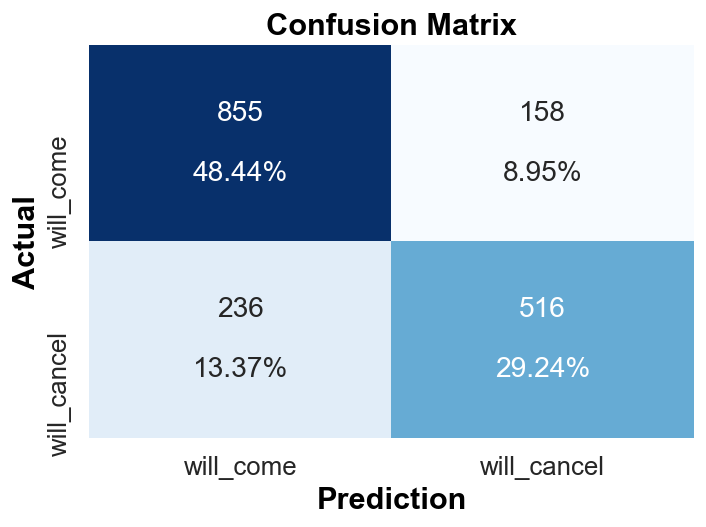

Optimal probability threshold (to maximize F-0.5): 0.648
F-0.5 Score: 0.748

Training 31 models to obtain STLY statistics...

Predicting cancellations for STLY date 2016-08-02...
Predicting cancellations for STLY date 2016-08-03...
Predicting cancellations for STLY date 2016-08-04...
Predicting cancellations for STLY date 2016-08-05...
Predicting cancellations for STLY date 2016-08-06...
Predicting cancellations for STLY date 2016-08-07...
Predicting cancellations for STLY date 2016-08-08...
Predicting cancellations for STLY date 2016-08-09...
Predicting cancellations for STLY date 2016-08-10...
Predicting cancellations for STLY date 2016-08-11...
Predicting cancellations for STLY date 2016-08-12...
Predicting cancellations for STLY date 2016-08-13...
Predicting cancellations for STLY date 2016-08-14...
Predicting cancellations for STLY date 2016-08-15...
Predicting cancellations for STLY date 2016-08-16...
Predicting cancellations for STLY date 2016-08-17...
Predicting cancellations f

In [11]:
h1_sim = generate_simulation(h1_dbd, AOD, 1, h1_res)

In [12]:
h1_sim.head(15)

,DOW,RoomsOTB,RevOTB,CxlForecast,Trn_RoomsOTB,Trn_RevOTB,TrnP_RoomsOTB,TrnP_RevOTB,Grp_RoomsOTB,Grp_RevOTB,Cnt_RoomsOTB,Cnt_RevOTB,Occ,RevPAR,RemSupply,ADR_OTB,Trn_ADR_OTB,TrnP_ADR_OTB,Grp_ADR_OTB,Cnt_ADR_OTB,WE,WD,STLY_Date,LYA_RoomsSold,LYA_ADR,LYA_RoomRev,LYA_RevPAR,LYA_NumCancels,Date,WeekEndDate,SellingPrice,STLY_OTB,STLY_Rev,STLY_ADR,STLY_SellingPrice,STLY_CxlForecast
2017-08-01,Tue,184.0,35239.14,20.0,151.0,29935.72,13.0,2488.24,2.0,291.66,18.0,2523.52,0.98,188.44,23,191.52,198.25,191.40,145.83,140.20,False,True,2016-08-02,183.0,170.00,31110.89,166.37,81.0,2017-08-01,2017-08-06,207.53,183.0,31110.89,170.00,181.88,23.0
2017-08-02,Wed,186.0,36141.47,22.0,152.0,30940.93,11.0,2004.24,2.0,291.66,21.0,2904.64,0.99,193.27,23,194.31,203.56,182.20,145.83,138.32,False,True,2016-08-03,182.0,173.96,31660.62,169.31,86.0,2017-08-02,2017-08-06,207.53,182.0,31660.62,173.96,184.25,25.0
2017-08-03,Thu,179.0,35705.54,23.0,140.0,29773.21,13.0,2225.28,3.0,453.06,23.0,3253.99,0.96,190.94,31,199.47,212.67,171.18,151.02,141.48,False,True,2016-08-04,183.0,182.11,33326.17,178.21,96.0,2017-08-03,2017-08-06,207.53,183.0,33326.17,182.11,187.44,24.0
2017-08-04,Fri,184.0,37156.71,23.0,147.0,31397.45,12.0,2191.21,3.0,453.06,22.0,3114.99,0.98,198.70,26,201.94,213.59,182.60,151.02,141.59,True,False,2016-08-05,183.0,188.02,34408.31,184.00,106.0,2017-08-04,2017-08-06,212.01,184.0,34607.31,188.08,191.57,18.0
2017-08-05,Sat,181.0,36181.00,21.0,136.0,28602.33,20.0,3953.82,3.0,538.06,22.0,3086.79,0.97,193.48,27,199.90,210.31,197.69,179.35,140.31,True,False,2016-08-06,180.0,190.06,34211.53,182.95,106.0,2017-08-05,2017-08-06,212.01,180.0,34211.53,190.06,192.95,17.0
2017-08-06,Sun,178.0,35927.57,26.0,128.0,27849.06,21.0,3927.83,5.0,774.32,24.0,3376.36,0.95,192.13,35,201.84,217.57,187.04,154.86,140.68,False,True,2016-08-07,178.0,185.96,33101.44,177.01,100.0,2017-08-06,2017-08-06,207.53,179.0,33400.44,186.59,189.21,23.0
2017-08-07,Mon,184.0,36690.66,26.0,125.0,27129.55,24.0,4619.66,7.0,989.18,28.0,3952.27,0.98,196.21,29,199.41,217.04,192.49,141.31,141.15,False,True,2016-08-08,183.0,184.85,33828.45,180.90,100.0,2017-08-07,2017-08-13,214.44,183.0,33828.45,184.85,191.88,33.0
2017-08-08,Tue,184.0,36682.97,27.0,125.0,27191.56,24.0,4621.46,8.0,1015.68,27.0,3854.27,0.98,196.17,30,199.36,217.53,192.56,126.96,142.75,False,True,2016-08-09,183.0,183.75,33625.94,179.82,94.0,2017-08-08,2017-08-13,214.44,183.0,33625.94,183.75,193.06,33.0
2017-08-09,Wed,185.0,37262.29,25.0,126.0,27580.23,26.0,5062.63,7.0,889.02,26.0,3730.41,0.99,199.26,27,201.42,218.89,194.72,127.00,143.48,False,True,2016-08-10,183.0,188.00,34403.59,183.98,95.0,2017-08-09,2017-08-13,214.44,183.0,34403.59,188.00,195.57,34.0
2017-08-10,Thu,179.0,35799.18,24.0,129.0,27460.57,20.0,4281.00,9.0,1199.82,21.0,2857.79,0.96,191.44,32,200.00,212.87,214.05,133.31,136.09,False,True,2016-08-11,179.0,194.92,34889.85,186.58,101.0,2017-08-10,2017-08-13,214.44,180.0,35080.85,194.89,198.65,22.0


Preparing crystal ball...
Predicting future cancellations...
Split complete.
Training sample size: 75931
Testing sample Size: 3010




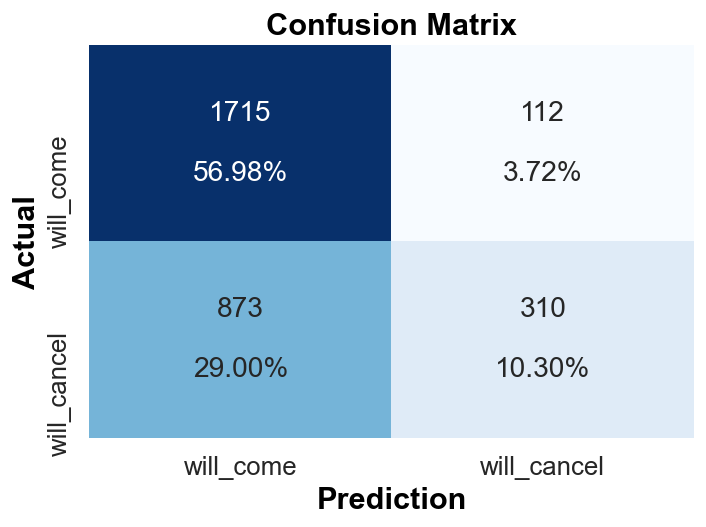

Optimal probability threshold (to maximize F-0.5): 0.4
F-0.5 Score: 0.54

Training 31 models to obtain STLY statistics...

Predicting cancellations for STLY date 2016-08-02...
Predicting cancellations for STLY date 2016-08-03...
Predicting cancellations for STLY date 2016-08-04...
Predicting cancellations for STLY date 2016-08-05...
Predicting cancellations for STLY date 2016-08-06...
Predicting cancellations for STLY date 2016-08-07...
Predicting cancellations for STLY date 2016-08-08...
Predicting cancellations for STLY date 2016-08-09...
Predicting cancellations for STLY date 2016-08-10...
Predicting cancellations for STLY date 2016-08-11...
Predicting cancellations for STLY date 2016-08-12...
Predicting cancellations for STLY date 2016-08-13...
Predicting cancellations for STLY date 2016-08-14...
Predicting cancellations for STLY date 2016-08-15...
Predicting cancellations for STLY date 2016-08-16...
Predicting cancellations for STLY date 2016-08-17...
Predicting cancellations for 

In [13]:
h2_sim = generate_simulation(h2_dbd, AOD, 2, h2_res)

In [14]:
h2_sim.head(15)

,DOW,RoomsOTB,RevOTB,CxlForecast,Trn_RoomsOTB,Trn_RevOTB,TrnP_RoomsOTB,TrnP_RevOTB,Cnt_RoomsOTB,Cnt_RevOTB,Grp_RoomsOTB,Grp_RevOTB,Occ,RevPAR,RemSupply,ADR_OTB,Trn_ADR_OTB,TrnP_ADR_OTB,Grp_ADR_OTB,Cnt_ADR_OTB,WE,WD,STLY_Date,LYA_RoomsSold,LYA_ADR,LYA_RoomRev,LYA_RevPAR,LYA_NumCancels,Date,WeekEndDate,SellingPrice,STLY_OTB,STLY_Rev,STLY_ADR,STLY_SellingPrice,STLY_CxlForecast
2017-08-01,Tue,211.0,27892.60,30.0,194.0,25791.40,15.0,1881.20,2.0,220.0,0.0,0.0,0.93,123.42,45,132.19,132.95,125.41,0.00,110.0,False,True,2016-08-02,218.0,117.57,25630.49,113.41,105.0,2017-08-01,2017-08-06,134.41,219.0,25695.49,117.33,120.53,16.0
2017-08-02,Wed,224.0,30899.51,22.0,181.0,24717.85,41.0,5961.66,2.0,220.0,0.0,0.0,0.99,136.72,24,137.94,136.56,145.41,0.00,110.0,False,True,2016-08-03,219.0,115.62,25319.84,112.03,114.0,2017-08-02,2017-08-06,134.41,220.0,25471.94,115.78,120.44,18.0
2017-08-03,Thu,221.0,29717.16,19.0,193.0,25670.50,26.0,3826.66,2.0,220.0,0.0,0.0,0.98,131.49,24,134.47,133.01,147.18,0.00,110.0,False,True,2016-08-04,224.0,118.04,26440.66,116.99,150.0,2017-08-03,2017-08-06,134.41,224.0,26440.66,118.04,120.71,11.0
2017-08-04,Fri,225.0,30473.06,16.0,199.0,26979.40,26.0,3493.66,0.0,0.0,0.0,0.0,1.00,134.84,17,135.44,135.57,134.37,0.00,0.0,True,False,2016-08-05,221.0,117.22,25906.05,114.63,169.0,2017-08-04,2017-08-06,136.15,223.0,26179.65,117.40,123.52,18.0
2017-08-05,Sat,213.0,28848.28,14.0,195.0,26665.12,18.0,2183.16,0.0,0.0,0.0,0.0,0.94,127.65,27,135.44,136.74,121.29,0.00,0.0,True,False,2016-08-06,224.0,121.45,27204.07,120.37,124.0,2017-08-05,2017-08-06,136.15,224.0,27204.07,121.45,125.29,19.0
2017-08-06,Sun,219.0,29368.51,16.0,197.0,26642.05,20.0,2457.96,0.0,0.0,2.0,268.5,0.97,129.95,23,134.10,135.24,122.90,134.25,0.0,False,True,2016-08-07,218.0,116.85,25473.28,112.71,118.0,2017-08-06,2017-08-06,134.41,220.0,25742.28,117.01,120.52,10.0
2017-08-07,Mon,226.0,31406.41,17.0,203.0,28623.85,21.0,2514.06,0.0,0.0,2.0,268.5,1.00,138.97,17,138.97,141.00,119.72,134.25,0.0,False,True,2016-08-08,220.0,119.65,26322.25,116.47,127.0,2017-08-07,2017-08-13,143.13,224.0,26640.50,118.93,124.53,12.0
2017-08-08,Tue,226.0,31200.66,24.0,204.0,28577.60,21.0,2534.06,0.0,0.0,1.0,89.0,1.00,138.06,24,138.06,140.09,120.67,89.00,0.0,False,True,2016-08-09,223.0,117.88,26287.46,116.32,129.0,2017-08-08,2017-08-13,143.13,226.0,26645.71,117.90,124.71,9.0
2017-08-09,Wed,225.0,31504.25,19.0,187.0,27148.62,37.0,4266.63,0.0,0.0,1.0,89.0,1.00,139.40,20,140.02,145.18,115.31,89.00,0.0,False,True,2016-08-10,223.0,120.98,26979.26,119.38,145.0,2017-08-09,2017-08-13,143.13,223.0,26979.26,120.98,125.68,10.0
2017-08-10,Thu,224.0,31409.77,14.0,183.0,26584.34,40.0,4736.43,0.0,0.0,1.0,89.0,0.99,138.98,16,140.22,145.27,118.41,89.00,0.0,False,True,2016-08-11,224.0,117.41,26299.28,116.37,183.0,2017-08-10,2017-08-13,143.13,224.0,26299.28,117.41,125.67,17.0


In [15]:
h1_sim.loc["2017-08-02"]

DOW                                  Wed
RoomsOTB                           186.0
RevOTB                          36141.47
CxlForecast                         22.0
Trn_RoomsOTB                       152.0
Trn_RevOTB                      30940.93
TrnP_RoomsOTB                       11.0
TrnP_RevOTB                      2004.24
Grp_RoomsOTB                         2.0
Grp_RevOTB                        291.66
Cnt_RoomsOTB                        21.0
Cnt_RevOTB                       2904.64
Occ                                 0.99
RevPAR                            193.27
RemSupply                             23
ADR_OTB                           194.31
Trn_ADR_OTB                       203.56
TrnP_ADR_OTB                       182.2
Grp_ADR_OTB                       145.83
Cnt_ADR_OTB                       138.32
WE                                 False
WD                                  True
STLY_Date            2016-08-03 00:00:00
LYA_RoomsSold                      182.0
LYA_ADR         

In [16]:
h1_dbd.loc["2017-08-02"]

DOW                               Wed
Occ                              0.99
RoomsSold                       185.0
ADR                            194.32
RoomRev                      35948.37
RevPAR                         192.24
NumCancels                      132.0
Trn_RoomsSold                   151.0
Trn_ADR                        203.63
Trn_RoomRev                  30747.83
Grp_RoomsSold                     2.0
Grp_ADR                        145.83
Grp_RoomRev                    291.66
TrnP_RoomsSold                   11.0
TrnP_ADR                        182.2
TrnP_RoomRev                  2004.24
Cnt_RoomsSold                    21.0
Cnt_ADR                        138.32
Cnt_RoomRev                   2904.64
WE                              False
WD                               True
STLY_Date         2016-08-03 00:00:00
Name: 2017-08-02 00:00:00, dtype: object

In [17]:
h1_dbd.loc['2016-08-03']

DOW                               Wed
Occ                              0.97
RoomsSold                       182.0
ADR                            173.96
RoomRev                      31660.62
RevPAR                         169.31
NumCancels                       86.0
Trn_RoomsSold                   159.0
Trn_ADR                        178.23
Trn_RoomRev                  28337.88
Grp_RoomsSold                     1.0
Grp_ADR                         241.0
Grp_RoomRev                     241.0
TrnP_RoomsSold                   14.0
TrnP_ADR                       154.47
TrnP_RoomRev                   2162.6
Cnt_RoomsSold                     8.0
Cnt_ADR                        114.89
Cnt_RoomRev                    919.14
WE                              False
WD                               True
STLY_Date         2015-08-05 00:00:00
Name: 2016-08-03 00:00:00, dtype: object

In [18]:
h1_res.columns

Index(['ResNum', 'IsCanceled', 'LeadTime', 'ArrivalDateYear',
       'ArrivalDateMonth', 'ArrivalDateWeekNumber', 'ArrivalDateDayOfMonth',
       'StaysInWeekendNights', 'StaysInWeekNights', 'Adults', 'Children',
       'Babies', 'Meal', 'Country', 'MarketSegment', 'DistributionChannel',
       'IsRepeatedGuest', 'PreviousCancellations',
       'PreviousBookingsNotCanceled', 'ReservedRoomType', 'AssignedRoomType',
       'BookingChanges', 'DepositType', 'Agent', 'Company',
       'DaysInWaitingList', 'CustomerType', 'ADR', 'RequiredCarParkingSpaces',
       'TotalOfSpecialRequests', 'ReservationStatus', 'ReservationStatusDate',
       'ArrivalDate', 'LOS', 'CheckoutDate', 'PreviousBookings', 'ResMadeDate',
       'NumPeople', 'CT_is_grp', 'CT_is_trn', 'CT_is_trnP', 'RS_No-Show',
       'MS_Corporate', 'MS_Direct', 'MS_Groups', 'MS_Offline TA/TO',
       'MS_Online TA', 'DC_Direct', 'DC_TA/TO', 'DC_Undefined', 'MEAL_FB',
       'MEAL_HB', 'MEAL_SC', 'MEAL_Undefined', 'FROM_PRT', 'FROM_G

In [19]:
h1_res.ReservationStatus.value_counts()

Check-Out    28938
Canceled     10831
No-Show        291
Name: ReservationStatus, dtype: int64

In [20]:
h2_sim.head()

,DOW,RoomsOTB,RevOTB,CxlForecast,Trn_RoomsOTB,Trn_RevOTB,TrnP_RoomsOTB,TrnP_RevOTB,Cnt_RoomsOTB,Cnt_RevOTB,Grp_RoomsOTB,Grp_RevOTB,Occ,RevPAR,RemSupply,ADR_OTB,Trn_ADR_OTB,TrnP_ADR_OTB,Grp_ADR_OTB,Cnt_ADR_OTB,WE,WD,STLY_Date,LYA_RoomsSold,LYA_ADR,LYA_RoomRev,LYA_RevPAR,LYA_NumCancels,Date,WeekEndDate,SellingPrice,STLY_OTB,STLY_Rev,STLY_ADR,STLY_SellingPrice,STLY_CxlForecast
2017-08-01,Tue,211.0,27892.60,30.0,194.0,25791.40,15.0,1881.20,2.0,220.0,0.0,0.0,0.93,123.42,45,132.19,132.95,125.41,0.0,110.0,False,True,2016-08-02,218.0,117.57,25630.49,113.41,105.0,2017-08-01,2017-08-06,134.41,219.0,25695.49,117.33,120.53,16.0
2017-08-02,Wed,224.0,30899.51,22.0,181.0,24717.85,41.0,5961.66,2.0,220.0,0.0,0.0,0.99,136.72,24,137.94,136.56,145.41,0.0,110.0,False,True,2016-08-03,219.0,115.62,25319.84,112.03,114.0,2017-08-02,2017-08-06,134.41,220.0,25471.94,115.78,120.44,18.0
2017-08-03,Thu,221.0,29717.16,19.0,193.0,25670.50,26.0,3826.66,2.0,220.0,0.0,0.0,0.98,131.49,24,134.47,133.01,147.18,0.0,110.0,False,True,2016-08-04,224.0,118.04,26440.66,116.99,150.0,2017-08-03,2017-08-06,134.41,224.0,26440.66,118.04,120.71,11.0
2017-08-04,Fri,225.0,30473.06,16.0,199.0,26979.40,26.0,3493.66,0.0,0.0,0.0,0.0,1.00,134.84,17,135.44,135.57,134.37,0.0,0.0,True,False,2016-08-05,221.0,117.22,25906.05,114.63,169.0,2017-08-04,2017-08-06,136.15,223.0,26179.65,117.40,123.52,18.0
2017-08-05,Sat,213.0,28848.28,14.0,195.0,26665.12,18.0,2183.16,0.0,0.0,0.0,0.0,0.94,127.65,27,135.44,136.74,121.29,0.0,0.0,True,False,2016-08-06,224.0,121.45,27204.07,120.37,124.0,2017-08-05,2017-08-06,136.15,224.0,27204.07,121.45,125.29,19.0


In [21]:
h1_sim.loc["2017-08-15", ["RoomsOTB", "STLY_OTB", "LYA_RoomsSold"]]

RoomsOTB         179.0
STLY_OTB         182.0
LYA_RoomsSold    181.0
Name: 2017-08-15 00:00:00, dtype: object

In [22]:
h1_dbd.loc["2017-08-15", ["RoomsSold", "ADR", "RoomRev", "RevPAR", "NumCancels"]]

RoomsSold        179.0
ADR             188.82
RoomRev       33798.75
RevPAR          180.74
NumCancels       111.0
Name: 2017-08-15 00:00:00, dtype: object

In [23]:
h1_dbd.loc["2016-08-16", ["RoomsSold", "ADR", "RoomRev", "RevPAR", "NumCancels"]]

RoomsSold        181.0
ADR             187.18
RoomRev       33880.04
RevPAR          181.18
NumCancels       113.0
Name: 2016-08-16 00:00:00, dtype: object

(186, 6)

In [26]:
h1_sim.to_pickle("pickle/h1_sim.pick")
h2_sim.to_pickle("pickle/h2_sim.pick")